# loan status prediction(binary classification)

In [ ]:
# importing required packages
import numpy as np
import pandas as pd

# it is important to import matplotlib to avoid complications with seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# reading data and converting it to a dataframe, find the dataset here: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbEJTVmwzd0JfSGNSTFBEQ21EVWdOSnN5MXMxd3xBQ3Jtc0tsY1duVTdWVDc0N1BWODhVRWxhOWdtVHh2UjJCbjMya012ZmJnQnhsMTNTWGxKQ1RlZU5zRkw1RV9QaXNLbkdIMk9ZT0NORjJtaGhxY2VBMXZUTmt3OFBuZ19oeDFMWl9UX0Z4UWVNYkNULU9FLWtxTQ&q=https%3A%2F%2Fwww.kaggle.com%2Fninzaami%2Floan-predication&v=XckM1pFgZmg
dataset = pd.read_csv('/content/dataset.csv')
dataset = pd.DataFrame(dataset)
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataset.shape

(614, 13)

# data cleaning

In [ ]:
# checking for the total number of "cells" with a NaN
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# wouldn't have had to .dropna() if there were more numerical values in the data than strings
# would've replaced with the mean of the non categorical columns
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# some normalization...

In [ ]:
dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [ ]:
dataset['Dependents'] = dataset['Dependents'].replace('3+',4)
dataset['Dependents']

1      1
2      0
3      0
4      0
5      2
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 480, dtype: object

In [ ]:
# converting categorical columns to numerical values
dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# visualization

<Axes: xlabel='Education', ylabel='count'>

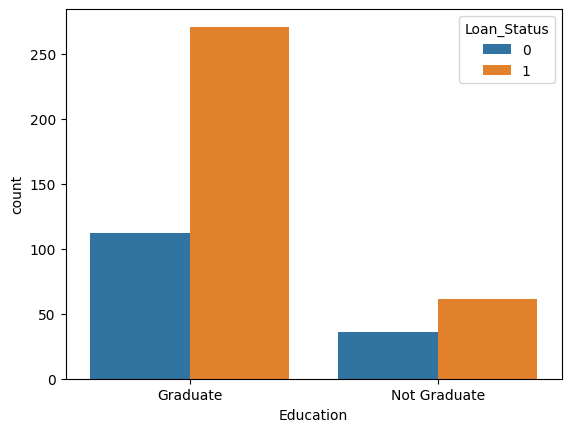

In [ ]:
# visualizing the relationship between a loan applicant and their literacy level with seaborn
sns.countplot(x='Education', hue='Loan_Status', data=dataset)

In [ ]:
# separating the dataset into features and and label
X = dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = dataset['Loan_Status']

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (408, 11) (72, 11)


In [ ]:
# using a linear classifier
classifier = svm.SVC(kernel='linear')

#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

print('the accuracy on training data : ', training_data_accuray)

the accuracy on training data :  0.7696078431372549


In [ ]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

print('the accuracy on test data : ', test_data_accuray)

the accuracy on test data :  0.8611111111111112
